## 로지스틱 회귀
#### 필요한 패키지를 불러온다:

In [60]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

#### 데이터를 불러온다:

In [61]:
os.chdir(r"D:\python_ML\python_ml_basic\data")

In [62]:
#df = pd.read_csv('data_customer.csv', header='infer',encoding='ISO-8859-1')
df = pd.read_csv('data_customer.csv', header='infer',encoding='latin1')

In [63]:
df.shape

(1000, 18)

In [64]:
df.head(5)

,Female,Home,Pregnancy Test,Birth Control,Feminine Hygiene,Folic Acid,Prenatal Vitamins,Prenatal Yoga,Body Pillow,Ginger Ale,Sea Bands,Stopped buying ciggies,Cigarettes,Smoking Cessation,Stopped buying wine,Wine,Maternity Clothes,PREGNANT
0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
1,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
2,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
3,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
4,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1


In [65]:
df.tail(5)

,Female,Home,Pregnancy Test,Birth Control,Feminine Hygiene,Folic Acid,Prenatal Vitamins,Prenatal Yoga,Body Pillow,Ginger Ale,Sea Bands,Stopped buying ciggies,Cigarettes,Smoking Cessation,Stopped buying wine,Wine,Maternity Clothes,PREGNANT
995,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
996,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
997,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
998,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
999,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0


In [66]:
df.columns

Index(['Female', 'Home', 'Pregnancy Test', 'Birth Control', 'Feminine Hygiene',
       'Folic Acid', 'Prenatal Vitamins', 'Prenatal Yoga', 'Body Pillow',
       'Ginger Ale', 'Sea Bands', 'Stopped buying ciggies', 'Cigarettes',
       'Smoking Cessation', 'Stopped buying wine', 'Wine', 'Maternity Clothes',
       'PREGNANT'],
      dtype='object')

In [67]:
# PREGNANT 컬럼을 Y로 따로 빼낸다
X=np.array(df.drop(columns='PREGNANT'))
Y=np.array(df.PREGNANT)

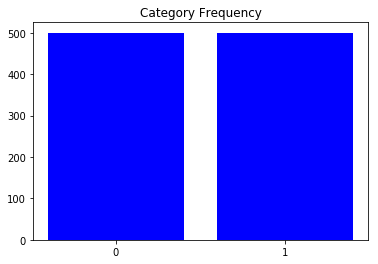

In [68]:
table = np.unique(Y,return_counts=True)
x_ticks = ['0','1']
plt.bar(x_ticks, table[:][1],color = 'blue')
plt.title('Category Frequency')
plt.show()

#### 로지스틱회귀 적용:

In [69]:
# 독립변수 17개 30퍼, rand.seed는 5 ( seed >> 테스트의 결과가 잘 됐는지 확인하기 위해 random값의 근원지를 지정함 )
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=5)

In [70]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(700, 17)
(300, 17)
(700,)
(300,)


In [73]:
glm = LogisticRegression()
glm.fit(X_train,Y_train) # 훈련시킴
Y_pred_train = glm.predict(X_train)
print(X_train)
print(Y_pred_train)
Y_pred_test = glm.predict(X_test)
print(X_test)
print(Y_pred_test)

[[0 1 0 ... 0 0 0]
 [0 1 0 ... 0 0 1]
 [0 0 0 ... 0 1 0]
 ...
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 1]
 [0 1 0 ... 0 1 0]]
[0 1 0 1 0 1 1 1 0 0 1 0 1 0 0 1 0 1 0 0 0 1 0 0 1 0 0 1 1 1 1 1 0 0 0 0 0
 0 0 1 1 1 0 1 1 0 0 0 1 0 0 0 1 0 1 1 0 1 0 1 0 1 0 0 0 0 1 1 0 1 0 0 0 0
 0 0 0 0 1 0 1 0 0 1 1 1 1 1 1 0 0 1 0 0 0 1 1 1 1 1 1 0 0 0 0 0 1 1 1 0 1
 1 1 0 1 0 0 0 1 0 1 1 0 0 0 0 0 0 1 0 0 1 0 1 0 1 0 0 1 1 1 1 1 1 0 1 1 0
 1 0 1 1 1 0 1 1 0 0 0 0 0 0 0 0 1 0 1 1 0 0 1 0 0 1 0 1 1 0 1 0 1 1 1 1 1
 0 0 0 0 1 1 1 0 0 1 1 0 1 0 0 1 0 1 0 0 0 0 1 1 0 1 1 0 0 1 1 0 0 0 1 0 0
 1 0 0 0 0 1 0 1 0 1 1 0 1 0 1 1 0 0 1 0 0 1 0 1 0 1 1 1 1 1 0 0 0 0 0 0 1
 1 0 0 0 1 0 1 1 1 0 1 0 1 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 1
 0 1 1 0 1 0 0 0 0 1 1 0 1 1 0 0 0 1 1 1 1 0 0 0 1 0 1 1 0 0 0 1 1 1 0 0 1
 1 1 0 0 1 1 1 1 0 0 0 0 1 1 0 0 0 0 1 1 1 1 1 0 1 0 0 0 0 1 0 0 1 0 0 1 0
 0 1 0 0 1 0 1 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 0 1 1 0 0 1 1 1
 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 0 0 0 0 0 1 

In [72]:
# 혼돈행렬
conf_mat = metrics.confusion_matrix(Y_test,Y_pred_test)
print(conf_mat)

[[148  13]
 [ 34 105]]


In [26]:
# 정확도, 민감도, 특이도
accuracy = (conf_mat[0,0] + conf_mat[1,1])/np.sum(conf_mat)
sensitivity = conf_mat[1,1]/(conf_mat[1,0]+conf_mat[1,1])
specificity = conf_mat[0,0]/(conf_mat[0,0]+conf_mat[0,1])
print('Accuracy    = '+ str(np.round(accuracy,2)))
print('Sensitvity  = '+ str(np.round(sensitivity,2)))
print('Specificity = '+ str(np.round(specificity,2)))

Accuracy    = 0.84
Sensitvity  = 0.76
Specificity = 0.92


#### 로지스틱회귀 적용 (1로 판단하는 기준 조정):

In [27]:
Y_pred_test_prob=glm.predict_proba(X_test)[:,1]

In [28]:
threshold = 0.6
Y_pred_test_val = (Y_pred_test_prob > threshold).astype(int)
conf_mat = metrics.confusion_matrix(Y_test,Y_pred_test_val)
print(conf_mat)

[[149  12]
 [ 39 100]]


In [29]:
accuracy = (conf_mat[0,0] + conf_mat[1,1])/np.sum(conf_mat)
sensitivity = conf_mat[1,1]/(conf_mat[1,0]+conf_mat[1,1])
specificity = conf_mat[0,0]/(conf_mat[0,0]+conf_mat[0,1])
print('Accuracy    = '+ str(np.round(accuracy,2)))
print('Sensitvity  = '+ str(np.round(sensitivity,2)))
print('Specificity = '+ str(np.round(specificity,2)))

Accuracy    = 0.83
Sensitvity  = 0.72
Specificity = 0.93


#### ROC 곡선 그리기:

In [33]:
t_grid = np.linspace(0.0,1.0,100) # 0~1 까지 100개의  grid로 쪼갠것.
true_positive=[]
false_positive=[]
t_grid

array([0.        , 0.01010101, 0.02020202, 0.03030303, 0.04040404,
       0.05050505, 0.06060606, 0.07070707, 0.08080808, 0.09090909,
       0.1010101 , 0.11111111, 0.12121212, 0.13131313, 0.14141414,
       0.15151515, 0.16161616, 0.17171717, 0.18181818, 0.19191919,
       0.2020202 , 0.21212121, 0.22222222, 0.23232323, 0.24242424,
       0.25252525, 0.26262626, 0.27272727, 0.28282828, 0.29292929,
       0.3030303 , 0.31313131, 0.32323232, 0.33333333, 0.34343434,
       0.35353535, 0.36363636, 0.37373737, 0.38383838, 0.39393939,
       0.4040404 , 0.41414141, 0.42424242, 0.43434343, 0.44444444,
       0.45454545, 0.46464646, 0.47474747, 0.48484848, 0.49494949,
       0.50505051, 0.51515152, 0.52525253, 0.53535354, 0.54545455,
       0.55555556, 0.56565657, 0.57575758, 0.58585859, 0.5959596 ,
       0.60606061, 0.61616162, 0.62626263, 0.63636364, 0.64646465,
       0.65656566, 0.66666667, 0.67676768, 0.68686869, 0.6969697 ,
       0.70707071, 0.71717172, 0.72727273, 0.73737374, 0.74747

In [31]:
for threshold in t_grid:
    Y_pred_test_val = (Y_pred_test_prob > threshold).astype(int)
    conf_mat = metrics.confusion_matrix(Y_test,Y_pred_test_val)
    sensitivity = conf_mat[1,1]/(conf_mat[1,0]+conf_mat[1,1])
    specificity = conf_mat[0,0]/(conf_mat[0,0]+conf_mat[0,1])
    true_positive.append(sensitivity)
    false_positive.append(1-specificity)                             

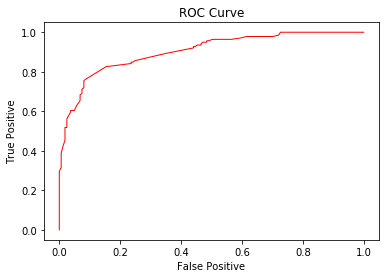

In [32]:
# 결과와 같이 곡선이 1에 가깝게 갈수록 분류 성능이 높다고 본다.
plt.plot(false_positive,true_positive,c='red',linewidth=1.0)
plt.xlabel('False Positive')
plt.ylabel('True Positive')
plt.title('ROC Curve')
plt.show()